In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

from matplotlib import rc
# Enable LaTeX for text rendering
rc('text', usetex=True)
rc('text.latex', preamble="\\usepackage{siunitx}")

In [2]:
initial_heights = np.array([
    0.804, 0.804, 0.8, 0.807, 0.802,
    0.561, 0.557, 0.563, 0.561, 0.55,
    0.741, 0.739, 0.745, 0.742,
    0.763, 0.76, 0.769, 0.763, 0.761,
    0.428, 0.431,
    0.804, 0.807, 0.8, 0.8, 0.801, 0.673, 0.804, 0.804, 0.807, 0.415, 0.804
])

final_heights = np.array([
    1.848, 1.815, 1.867, 1.865, 1.7907,
    1.312, 1.23, 1.226, 1.283, 1.31,
    1.695, 1.65, 1.675, 1.65,
    1.811, 1.699, 1.775, 1.721, 1.719,
    0.957, 0.964,
    1.9566144, 2.0401767, 1.97192, 2.12552, 2.2072356, 1.72288, 2.1624384, 2.1361476, 2.0918247, 1.1026135, 1.93161
])

change_in_heights = final_heights - initial_heights

separation_distances = np.array([
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0,
    19, 14, 6, 29, 53, 18, 36, 39, 27, 25, 5
]) / 1000


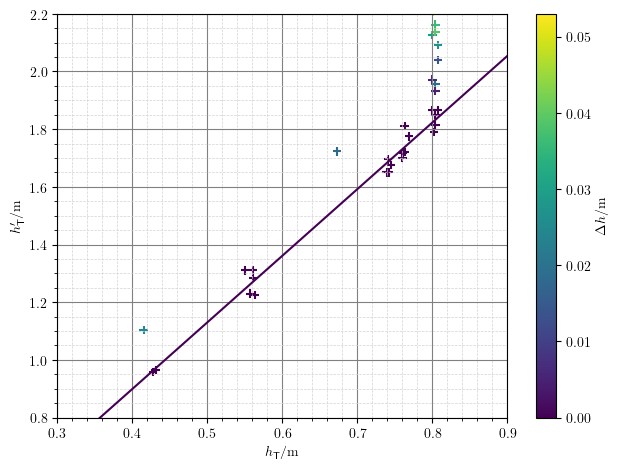

In [3]:
no_sep_initial_heights = np.array([
    0.804, 0.804, 0.8, 0.807, 0.802,
    0.561, 0.557, 0.563, 0.561, 0.55,
    0.741, 0.739, 0.745, 0.742,
    0.763, 0.76, 0.769, 0.763, 0.761,
    0.428, 0.431,
])
no_sep_final_heights = np.array([
    1.848, 1.815, 1.867, 1.865, 1.7907,
    1.312, 1.23, 1.226, 1.283, 1.31,
    1.695, 1.65, 1.675, 1.65,
    1.811, 1.699, 1.775, 1.721, 1.719,
    0.957, 0.964,
])

tx = no_sep_initial_heights
ty = no_sep_final_heights

xlims = (0.3, 0.9)
ylims = (0.8, 2.2)

xerror = 0.005
yerror = 0.005

x = initial_heights
y = final_heights
z = separation_distances

plt.scatter(x, y, c=z, cmap='viridis', marker='+')
# plt.errorbar(x, y, c=z, xerr=xerror, yerr=yerror, fmt='+', cmap='viridis')

plt.xlim(xlims)
plt.ylim(ylims)

plt.xlabel(r'$h_{\text{T}} / \si{\metre}$')
plt.ylabel(r"$h_{\text{T}}' / \si{\metre}$")
plt.colorbar(label=r'$\Delta h / \si{\metre}$')

# Create trendline through just points with no separation

m, b = np.polyfit(tx, ty, 1)
plt.plot(xlims, [m*x + b for x in xlims], color='#440154')

plt.tight_layout()

x_tick_positions = np.arange(xlims[0], xlims[1] + 0.01, 0.1)
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(ylims[0], ylims[1] + 0.01, 0.2)
plt.yticks(y_tick_positions)

# Add gridlines
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.8)  # Major gridlines
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)  # Minor gridlines



plt.savefig(r"C:\Coding\practical-project-25\graphs\with_separation/3d-with-separation.png", dpi = 600)
plt.show()

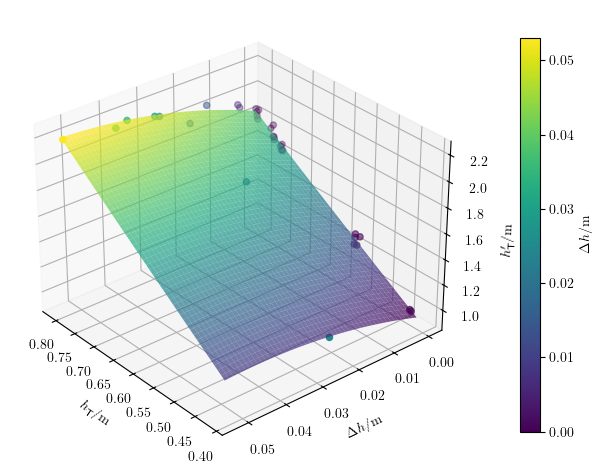

In [4]:
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(initial_heights, separation_distances, final_heights, c=separation_distances, cmap='viridis')

# Define a polynomial surface equation for fitting
def polynomial_surface_function(data, a, b, c, d, e, f):
    h0, dx = data
    return a * h0**2 + b * dx**2 + c * h0 * dx + d * h0 + e * dx + f

# Prepare the data for fitting
h0_dx = np.vstack((initial_heights, separation_distances))  # Stack h0 and dx as rows
popt, _ = curve_fit(polynomial_surface_function, h0_dx, final_heights, p0=[1, 1, 1, 1, 1, 1])

# Generate the polynomial surface
h0_range = np.linspace(min(initial_heights), max(initial_heights), 50)
dx_range = np.linspace(min(separation_distances), max(separation_distances), 50)
h0_mesh, dx_mesh = np.meshgrid(h0_range, dx_range)
h1_surface = polynomial_surface_function((h0_mesh, dx_mesh), *popt)

# Plot the polynomial surface
ax.plot_surface(h0_mesh, dx_mesh, h1_surface, cmap='viridis', alpha=0.7, edgecolor='none')

# Adjust the view angle
ax.view_init(elev=30, azim=140)

# Set labels and customization
ax.set_xlabel(r'$h_{\text{T}} / \si{\metre}$')
ax.set_ylabel(r'$\Delta h / \si{\metre}$')
ax.set_zlabel(r"$h_{\text{T}}' / \si{\metre}$")

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1, shrink=0.73)  # Add padding to separate the colorbar
cbar.set_label(r'$\Delta h / \si{\metre}$')

# Adjust layout to avoid overlapping
plt.subplots_adjust(left=0.2, right=0.8)  # Add more space on the left and right sides

plt.savefig(r"C:\Coding\practical-project-25\graphs\with_separation/3d-with-polynomial-surface.png", dpi = 600)

plt.show()


In [5]:
# Define a polynomial surface equation for fitting
def polynomial_surface_function(data, a, b, c, d, e, f):
    h0, dx = data
    return a * h0**2 + b * dx**2 + c * h0 * dx + d * h0 + e * dx + f

# Prepare the data for fitting
h0_dx = np.vstack((initial_heights, separation_distances))  # Stack h0 and dx as rows
popt, _ = curve_fit(polynomial_surface_function, h0_dx, final_heights, p0=[1, 1, 1, 1, 1, 1])

# Calculate RMSE for the fitted surface
predicted_heights = polynomial_surface_function(h0_dx, *popt)
rmse = np.sqrt(mean_squared_error(final_heights, predicted_heights))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the equation of the surface of best fit
a, b, c, d, e, f = popt
print(f"The equation of the surface of best fit is: z = {a:.4f}*h0^2 + {b:.4f}*dx^2 + {c:.4f}*h0*dx + {d:.4f}*h0 + {e:.4f}*dx + {f:.4f}")

Root Mean Squared Error (RMSE): 0.03600417098114641
The equation of the surface of best fit is: z = 0.1080*h0^2 + -106.7040*dx^2 + 7.3684*h0*dx + 2.1979*h0 + 6.5647*dx + 0.0032
